In [1]:
from CollectMaPSAs import *
import cPickle
import matplotlib.pyplot as plt

In [4]:
def get_mapsas(files):
    mapsa_names = []
    mapsas = []
    
    for f1 in files:
        print('Reading MaPSA names from ' + f1)
        with open(f1) as f:
            reader = csv.reader(f)
            mapsa_names = [row[0] for row in reader]

    for m in mapsa_names:

        # Read MaPSA object from file, if available
        fname = 'pickles/'+m+'.pkl'
        if os.path.isfile(fname):
            print("Loading MaPSA " + m)
            mapsa = cPickle.load(open(fname,'rb'))
        else: # Create it
            print("MaPSA " + m +" has no pickle")

        mapsas += [mapsa]
    return mapsas

In [5]:
name = "round2a-HPK"
mapsas = get_mapsas([name+".txt"])

Reading MaPSA names from round2a-HPK.txt
['HPK28_1', 'HPK28_2', 'HPK29_2', 'HPK30_1', 'HPK30_2', 'HPK31_1', 'HPK31_2', 'HPK32_2', 'HPK33_1', 'HPK33_2', 'HPK34_1', 'HPK34_2', 'HPK35_1', 'HPK35_2', 'HPK36_1', 'HPK36_2', 'HPK37_1', 'HPK37_2', 'HPK38_1', 'HPK38_2']
Loading MaPSA HPK28_1
Loading MaPSA HPK28_2
Loading MaPSA HPK29_2
Loading MaPSA HPK30_1
Loading MaPSA HPK30_2
Loading MaPSA HPK31_1
Loading MaPSA HPK31_2
Loading MaPSA HPK32_2
Loading MaPSA HPK33_1
Loading MaPSA HPK33_2
Loading MaPSA HPK34_1
Loading MaPSA HPK34_2
Loading MaPSA HPK35_1
Loading MaPSA HPK35_2
Loading MaPSA HPK36_1
Loading MaPSA HPK36_2
Loading MaPSA HPK37_1
Loading MaPSA HPK37_2
Loading MaPSA HPK38_1
Loading MaPSA HPK38_2


In [6]:
def scurve_plots(mapsas, outdir):

    print("Processing " + str(len(mapsas)) + " MaPSAs for pixel plots")

    # CAL pre-trim
    df = pd.DataFrame([])
    for m in mapsas:
        for chip in m.mpa_chips:
            if chip.mapsa_name+"-"+str(chip.index) not in badchips:
                df = df.append(chip.CALS_pretrim[chip.pixels["CAL_RMS_pretrim"]==0])
#                df = df.append(chip.CALS_pretrim[chip.pixels["CAL_Mean_pretrim"]<0])

    print(df.shape)
    df = df[0:3].transpose()[0:256]
    df.plot(legend=False,figsize=(12,9))
    plt.xlabel('Units',fontweight='bold')
    plt.ylabel('CAL pre-trim',fontweight='bold')
    plt.tight_layout()
    plt.savefig(outdir+"/CAL_pretrim_Scurves_RMSEQ0.png",bbox_inches='tight')
    plt.savefig(outdir+"/CAL_pretrim_Scurves_RMSEQ0.pdf",bbox_inches='tight')

    plt.show()

    # CAL post-trim
    df = pd.DataFrame([])
    for m in mapsas:
        for chip in m.mpa_chips:
            if chip.mapsa_name+"-"+str(chip.index) not in badchips:
#                df = df.append(chip.CALS[chip.pixels["CAL_RMS"]==0])
                df = df.append(chip.CALS[chip.pixels["CAL_Mean"]<0])

    print(df.shape)
    df = df.transpose()[0:256]

    # THR pre-trim
    df = pd.DataFrame([])
    for m in mapsas:
        for chip in m.mpa_chips:
            if chip.mapsa_name+"-"+str(chip.index) not in badchips:
#                df = df.append(chip.THRS_pretrim[chip.pixels["THR_RMS_pretrim"]==0])
                df = df.append(chip.THRS_pretrim[chip.pixels["THR_Mean_pretrim"]<0])

    print(df.shape)
    df = df[0:3].transpose()[0:256]

    # THR post-trim                                                                                                 
    df = pd.DataFrame([])
    for m in mapsas:
        for chip in m.mpa_chips:
            if chip.mapsa_name+"-"+str(chip.index) not in badchips:
#                df = df.append(chip.THRS[chip.pixels["THR_RMS"]==0])
                df = df.append(chip.THRS[chip.pixels["THR_Mean"]<0])
    print(df.shape)
    df = df.transpose()[0:256]

    # Bump
    df = pd.DataFrame([])
    for m in mapsas:
        for chip in m.mpa_chips:
            if chip.mapsa_name+"-"+str(chip.index) not in badchips:
#                df = df.append(chip.BumpS[chip.pixels["Bump_RMS"]==0])
                df = df.append(chip.BumpS[chip.pixels["Bump_Mean"]<0])

    print(df.shape)
    df = df.transpose()[0:256]


Processing 20 MaPSAs for pixel plots
(28, 257)


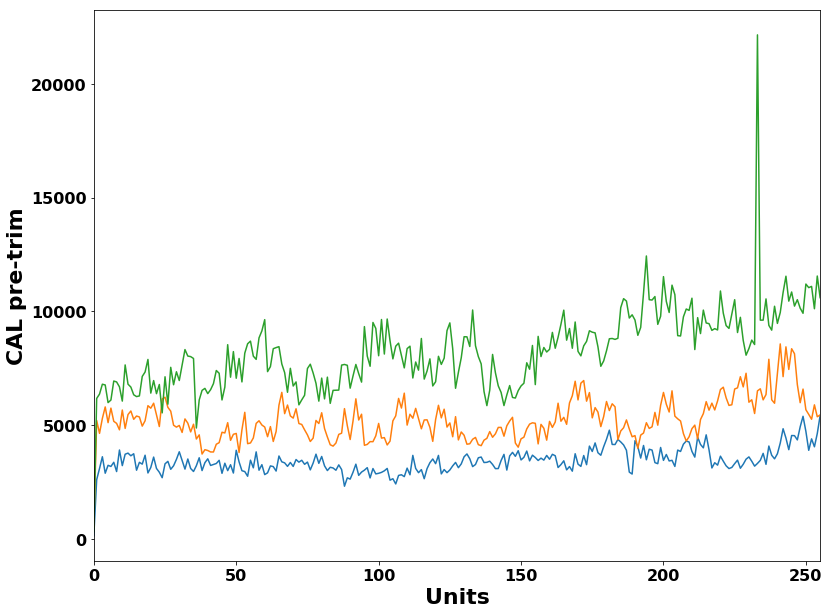

(125, 257)
(594, 257)
(0, 257)
(66066, 257)


In [7]:
scurve_plots(mapsas,name)